<a href="https://colab.research.google.com/github/mubasshar009/ML_DL_Model/blob/master/MNISt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading MNISt Dataset in Keras

# Loading MNISt Dataset in Keras

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0]   #Image Converted Into Tensor Data
#All minimum values will lead to black color
#All Maximum pixels values will lead to white color

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_images[0].ndim

2

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels[0]

5

## Listing 2.2 The Network **Architecture**

  Activation Func Process only useful info.Also convert linearity into non linearity
Softmax activation func will return 10 output proablitiy

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
#                        Out,    Act_Func,            Input Shape
network.add(layers.Dense(512,activation = 'relu',input_shape = (28*28,)))
network.add(layers.Dense(10,activation = 'softmax'))   # No need for input shape because its a sequential model so previous layer output will be its input

# 2.3 The Compilation Step

  rmsprop is a gradient descent optimizer

In [ ]:
network.compile(optimizer= 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])  

# 2.4 Preparing the image data
#### Normalization
by dividing with 255 we will get values range between 0 and 1

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

# 2.5 Preparing the Labels

## to_categorical funtcion converts data into one hot encode
#### True == 1 And False == 0

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Network.fit wil used to train the model

#             input         labels     iteration ,   batch size will select only specific numbrs of data from the total dataset

In [ ]:
network.fit(train_images,train_labels,epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2553 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0367 - accuracy: 0.9889


# Evalutaion On Test data set

In [ ]:
test_losss,test_acc = network.evaluate(test_images,test_labels)
print('test acc :',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9821
test acc : 0.9821000099182129


In [ ]:
network.predict(test_images)[0]

array([2.5843856e-09, 2.3733642e-11, 1.0983080e-06, 1.0922783e-05,
       1.7989319e-12, 2.4213326e-08, 1.0056683e-15, 9.9998760e-01,
       1.7352608e-08, 2.9680189e-07], dtype=float32)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


# 2.6 Displaying The Fourth Digits

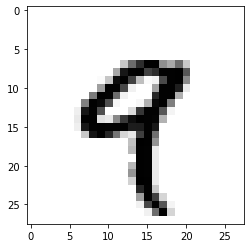

In [ ]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9